# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,0.429630,0.463768,15.000000,12.027746,2,31,84.333333,73.721699,8,184,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,0.345679,0.350282,9.000000,5.715476,2,16,39.333333,25.328947,9,71,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,0.050000,0.073034,10.000000,1.000000,9,11,44.500000,6.500000,38,51,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.179487,0.173824,26.000000,9.273618,13,34,108.666667,38.732702,54,139,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.166667,0.202834,33.333333,10.964589,18,43,149.000000,56.166419,75,211,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
975,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
977,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [5]:
csop_model.select_target(target = "zscore_efficiency")

In [6]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.391	MAE: 0.5244	MSE: 0.5876	RMSE: 0.7666
Validation Set:	R2: 0.2162	MAE: 0.7358	MSE: 1.0222	RMSE: 1.011
Test Set:	R2: 0.1229	MAE: 0.7147	MSE: 0.8762	RMSE: 0.9361


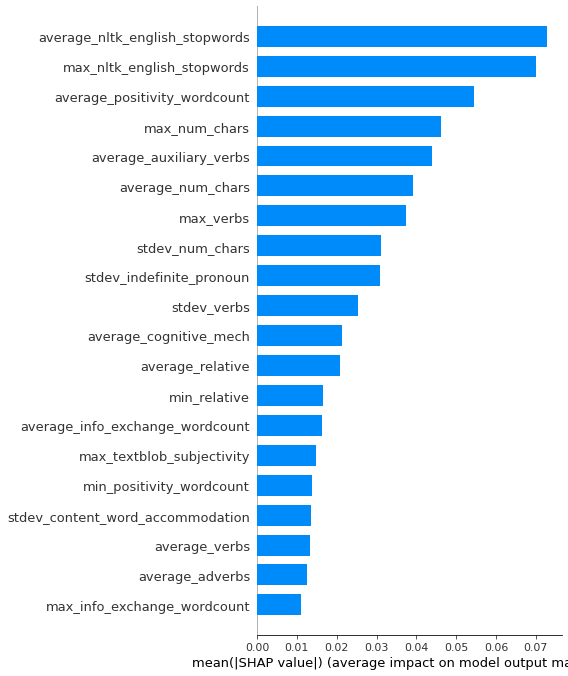

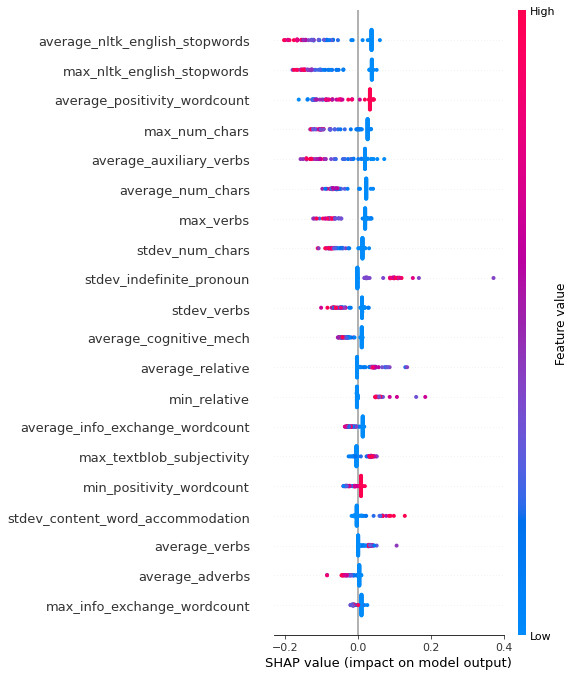

In [7]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [8]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [9]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.378	MAE: 0.5237	MSE: 0.6089	RMSE: 0.7803
Validation Set:	R2: 0.1811	MAE: 0.6998	MSE: 0.8596	RMSE: 0.9271
Test Set:	R2: 0.1945	MAE: 0.694	MSE: 0.8957	RMSE: 0.9464


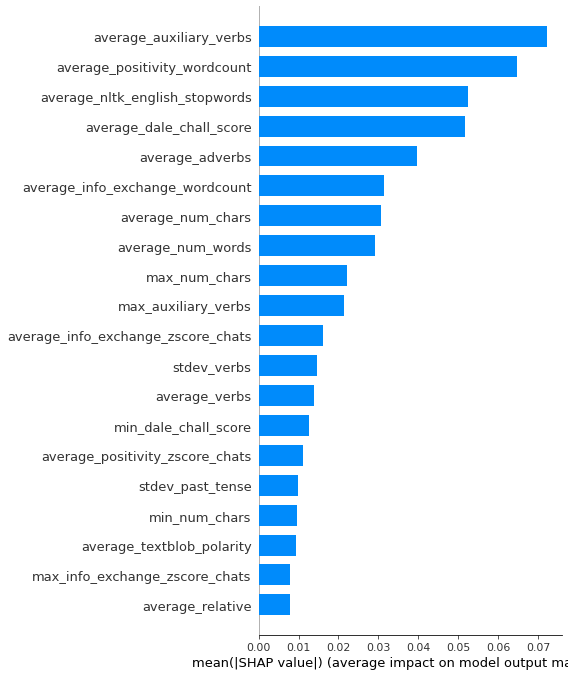

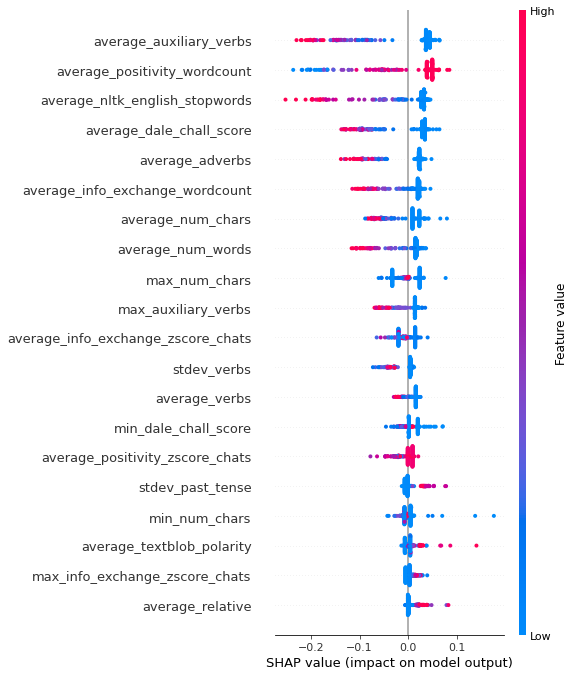

In [10]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

### Emily Checking Train-Test Split Functionality

In [11]:
csop_blended_model.X_train

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
181,-0.592923,-0.609800,-0.418355,-0.431856,-0.317278,-0.431352,-0.433418,-0.437966,-0.338159,-0.443611,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1078,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1798,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
218,2.668881,2.626504,0.153917,0.822393,-0.461885,0.334135,0.206467,0.906637,-0.468088,0.395899,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1246,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
902,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
349,0.979733,1.235415,0.944198,0.831073,1.128790,0.997558,0.846353,1.054394,0.961127,1.045120,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
751,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [12]:
csop_blended_model.X_val

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
585,-0.592923,-0.609800,-0.336602,-0.431856,-0.172672,-0.380320,-0.361318,-0.437966,-0.208231,-0.398837,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
481,-0.592923,-0.609800,0.072164,-0.431856,0.550363,-0.125157,0.143380,-0.437966,0.701269,-0.085420,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
893,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1417,1.010016,0.880990,-0.130888,-0.052179,-0.375672,-0.138235,-0.114247,-0.093371,-0.175571,-0.104511,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
525,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,0.039538,0.033283,2.225527,0.621711,3.092943,1.357814,2.360697,0.656789,3.298964,1.414320,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
339,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
129,0.952142,0.683131,-0.064091,-0.020357,-0.028065,-0.023092,-0.084936,-0.121879,-0.013338,-0.085420,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1402,-0.159922,-0.253130,4.632079,0.962879,6.726730,2.798454,4.358213,0.620505,6.663777,2.482247,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [13]:
csop_blended_model.X_test

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
1605,1.329300,1.338458,0.921978,1.094080,-0.045328,1.191586,1.076580,1.280245,0.043874,1.461783,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1502,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
70,-0.592923,-0.609800,0.235670,-0.431856,0.839577,-0.023092,0.107330,-0.437966,0.636305,-0.107807,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1052,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,-0.592923,-0.609800,-0.500108,-0.431856,-0.461885,-0.482385,-0.505518,-0.437966,-0.468088,-0.488385,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1869,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1704,-0.647994,-0.647424,-0.531980,-0.487084,-0.375672,-0.526100,-0.547773,-0.486156,-0.395015,-0.531682,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
115,1.091451,1.103985,1.080453,0.924902,0.694970,0.997558,1.230885,1.094826,0.798716,1.179442,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


# Juries Model

In [14]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [15]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8639	MAE: 0.3232	MSE: 0.1403	RMSE: 0.3746
Validation Set:	R2: -0.0916	MAE: 0.777	MSE: 0.8366	RMSE: 0.9147
Test Set:	R2: 0.1442	MAE: 0.7141	MSE: 0.7373	RMSE: 0.8587


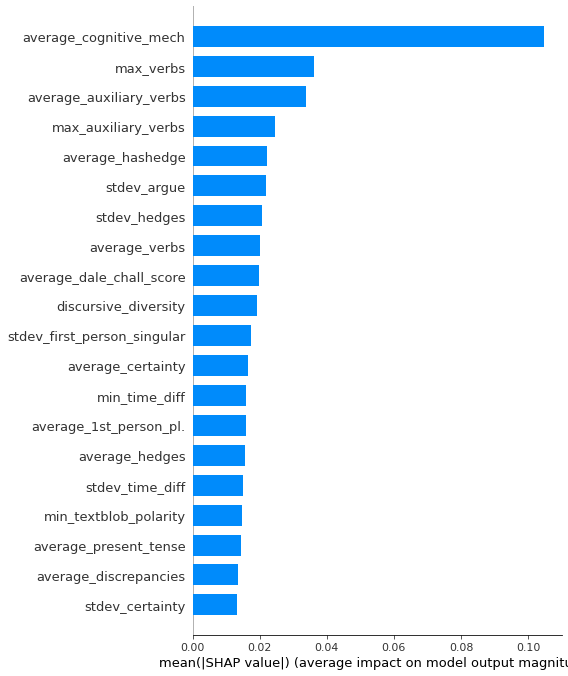

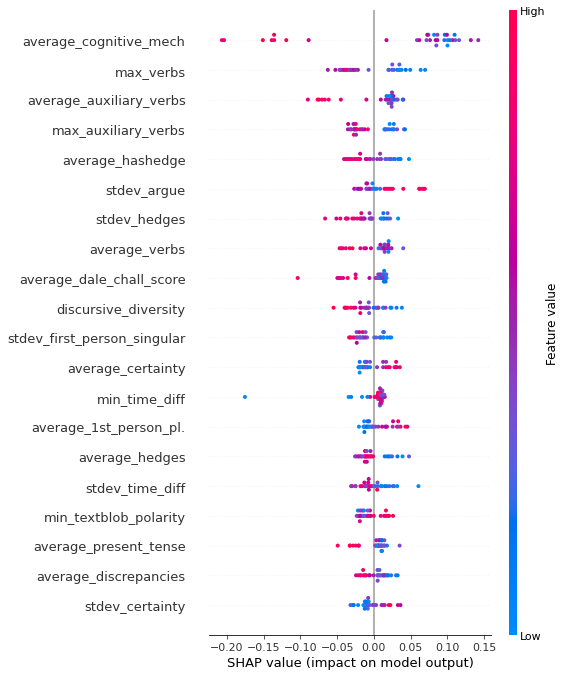

In [16]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [17]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [18]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [19]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,-0.966684,-0.902061,1.056610,-0.133254,-0.364195,-0.115264,0.924731,-0.263991,-0.082895,-0.116493,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,-1.429728,-1.466075,1.195032,-0.574666,1.829196,0.613128,1.303952,-0.516440,2.253308,0.746363,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,-0.069558,-0.155293,-0.925492,-0.664589,-0.936384,-0.768305,-0.879261,-0.673352,-0.634239,-0.630330,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.431607,0.220723,0.059976,0.586130,-0.602607,0.361959,0.072135,0.413604,-0.652928,0.193747,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,-1.593301,-1.715586,2.287747,-0.592311,3.116621,0.964766,2.254175,-0.698695,3.281237,0.896636,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-1.155059,-1.157620,-0.927146,-0.858036,-0.474490,-0.914655,-0.919769,-0.847064,-0.471059,-0.902045,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,0.564689,0.672912,0.218480,0.328400,0.129463,0.160269,0.038561,0.223074,-0.038227,0.029376,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,-0.206233,-0.222889,-0.200651,-0.448876,0.129463,-0.397099,-0.253345,-0.478105,0.009865,-0.459620,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,-0.223529,-0.282177,0.497901,-0.119255,0.733415,0.239893,0.441307,-0.187011,0.683160,0.091470,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


In [21]:
# standardize_within defaults to true, so let's check what happens when we change it to false
joint_model_std_across = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= False)

In [22]:
joint_model_std_across.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [31]:
joint_model_std_across.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,0.142519,0.143817,3.009768,1.934112,1.429007,2.118215,2.953652,1.854109,1.863091,2.148553,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,-0.059825,-0.095861,3.105763,1.524462,4.457525,2.683934,3.217933,1.618191,5.106987,2.821295,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,0.534553,0.461156,1.635189,1.441009,0.638959,1.611019,1.696440,1.471554,1.097531,1.747931,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.753556,0.620943,2.318607,2.601732,1.099820,2.488858,2.359473,2.487333,1.071580,2.390438,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,-0.131305,-0.201890,3.863556,1.508086,6.235134,2.957040,3.880149,1.447871,6.534301,2.938458,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-0.813038,-0.817707,-0.581561,-0.598391,-0.480276,-0.593335,-0.568357,-0.586710,-0.472514,-0.580210,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2580,1.184415,1.333912,-0.118528,0.115402,-0.151090,-0.066631,-0.185548,0.058722,-0.238954,-0.126676,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2581,0.289005,0.280982,-0.287931,-0.352229,-0.151090,-0.339736,-0.302151,-0.364180,-0.213002,-0.364781,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2582,0.268916,0.211295,-0.005593,-0.153919,0.178097,-0.027616,-0.024669,-0.188613,0.150314,-0.096440,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5162	MAE: 0.38	MSE: 0.4849	RMSE: 0.6963
Validation Set:	R2: 0.1085	MAE: 0.7009	MSE: 0.8808	RMSE: 0.9385
Test Set:	R2: 0.141	MAE: 0.6913	MSE: 0.8427	RMSE: 0.918


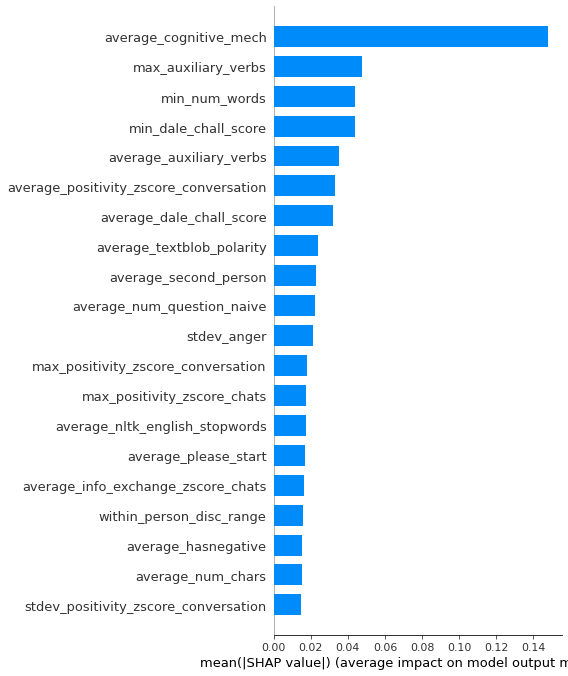

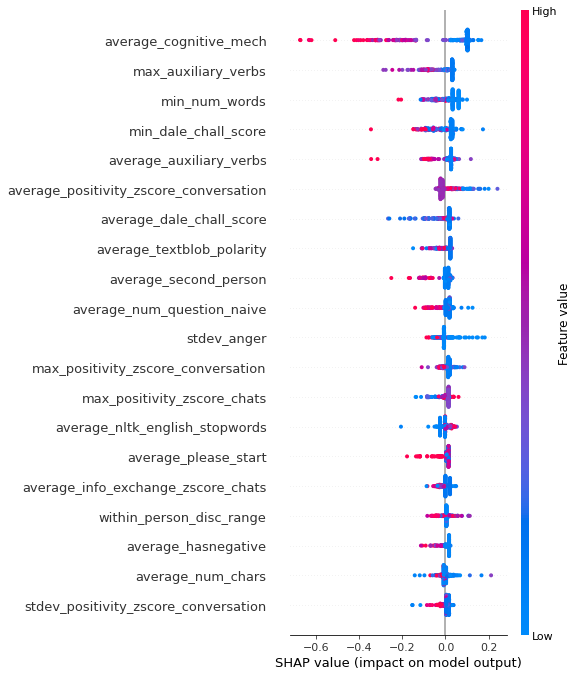

In [26]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1144	MAE: 0.7141	MSE: 0.8876	RMSE: 0.9421
Validation Set:	R2: 0.0912	MAE: 0.7149	MSE: 0.898	RMSE: 0.9476
Test Set:	R2: 0.1195	MAE: 0.7057	MSE: 0.8638	RMSE: 0.9294


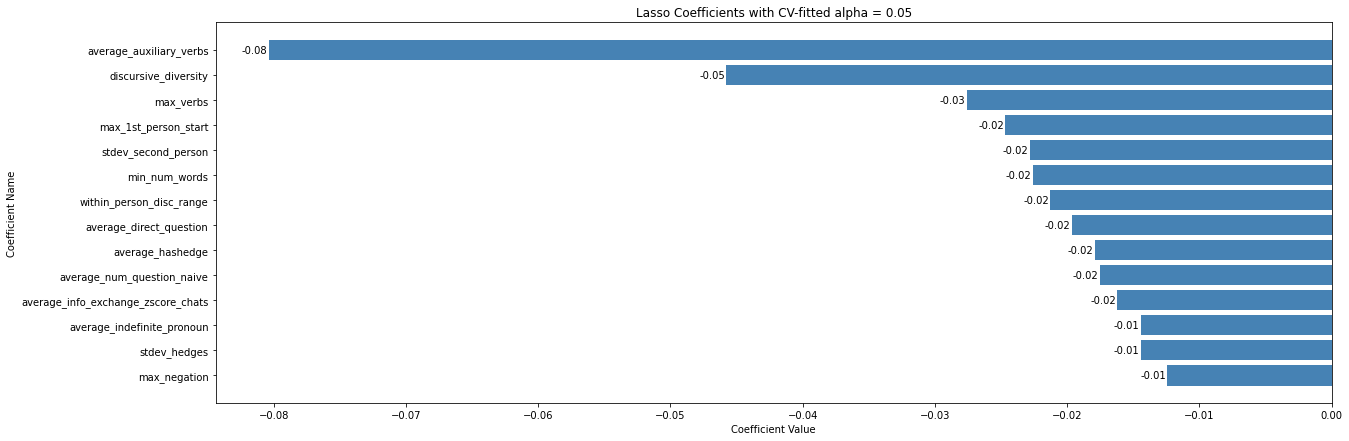

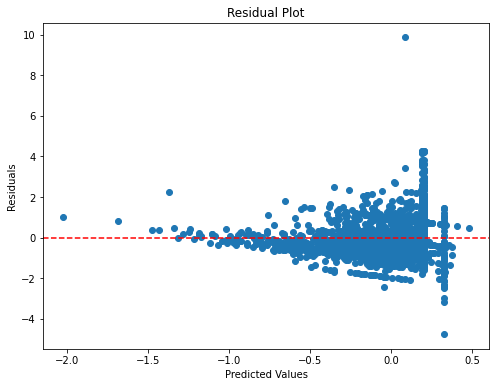

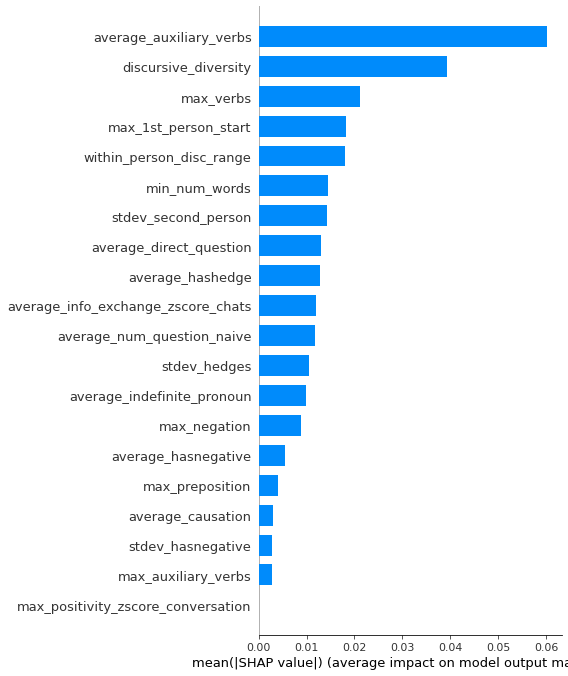

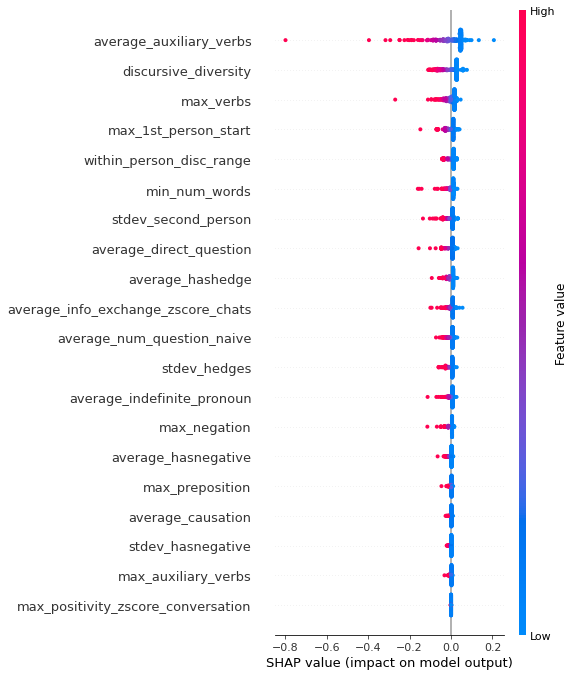

In [27]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.2559	MAE: 0.6527	MSE: 0.7457	RMSE: 0.8635
Validation Set:	R2: -0.0374	MAE: 0.7732	MSE: 1.025	RMSE: 1.0124
Test Set:	R2: -0.199	MAE: 0.838	MSE: 1.1763	RMSE: 1.0846


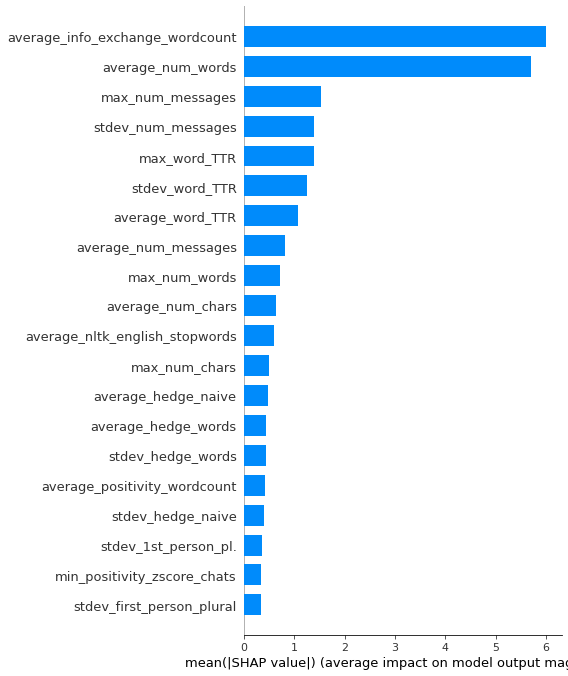

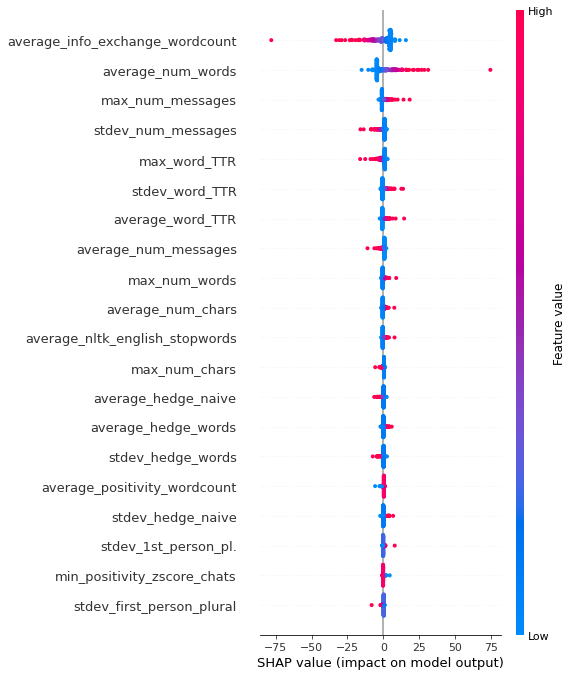

In [28]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.467	MAE: 0.4849	MSE: 0.5342	RMSE: 0.7309
Validation Set:	R2: 0.1677	MAE: 0.6664	MSE: 0.8224	RMSE: 0.9069
Test Set:	R2: 0.1896	MAE: 0.6702	MSE: 0.7951	RMSE: 0.8917


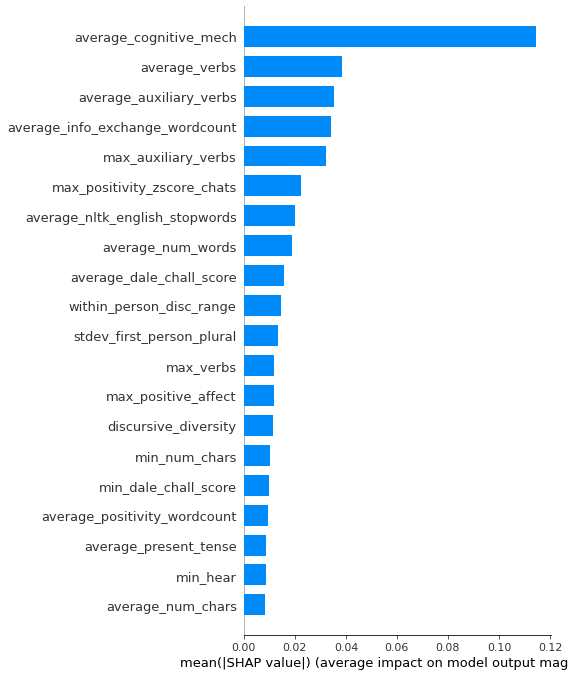

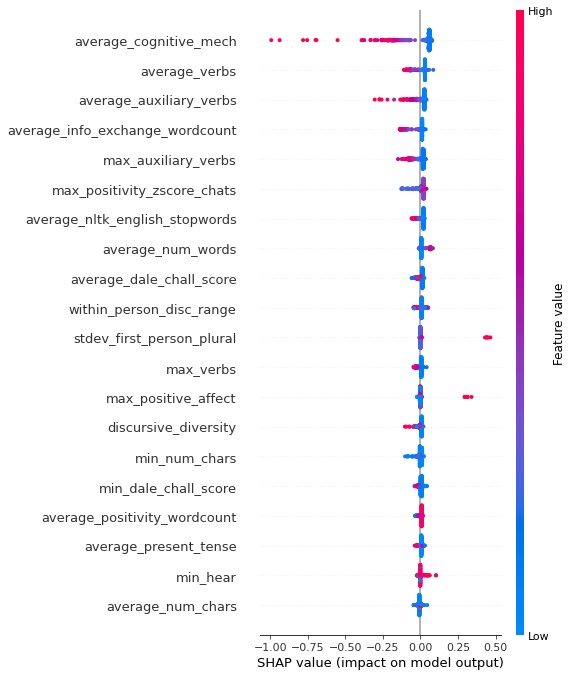

In [29]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4645	MAE: 0.4858	MSE: 0.5367	RMSE: 0.7326
Validation Set:	R2: 0.1525	MAE: 0.6734	MSE: 0.8373	RMSE: 0.915
Test Set:	R2: 0.1926	MAE: 0.6622	MSE: 0.7921	RMSE: 0.89


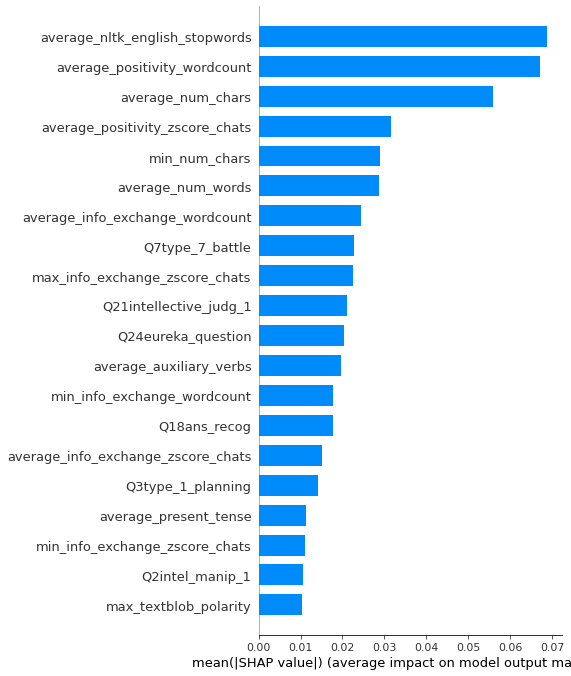

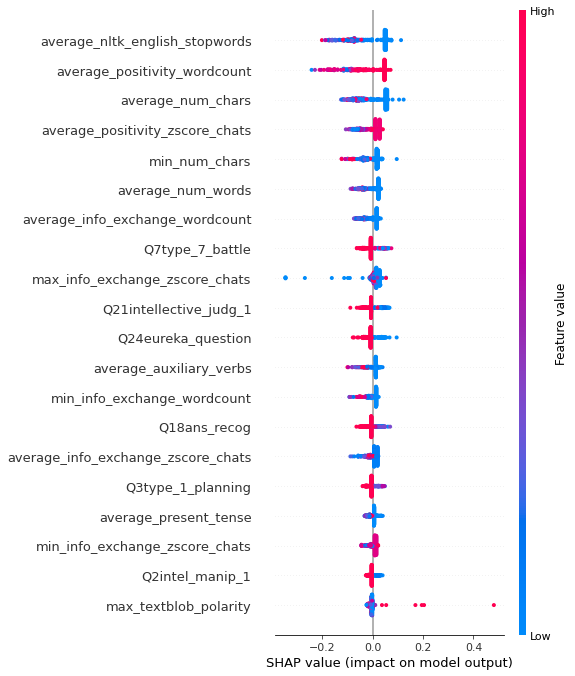

In [30]:
joint_model_std_across.define_model(model_type = 'rf')
joint_model_std_across.evaluate_model(joint_model_std_across.baseline_model)